### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [11]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [12]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
# Load Dataset
df = pd.read_csv("yelp.csv")

In [37]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [38]:
# Value Counts
df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<Axes: xlabel='stars', ylabel='count'>

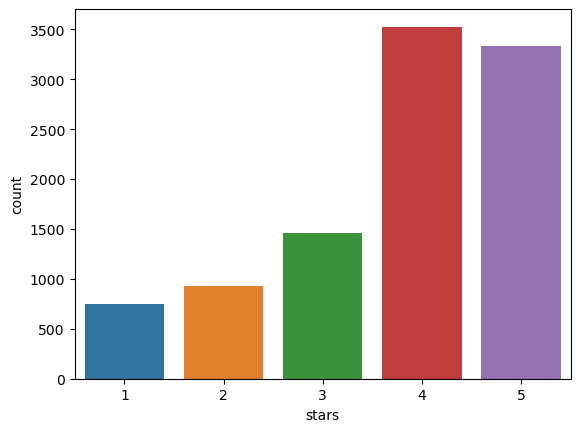

In [39]:
# Plot
sns.countplot(x='stars',data=df)

In [40]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [41]:
# User handles
df['Clean_text'] = df['text'].apply(nfx.remove_userhandles)

In [42]:
# Stopwords
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [46]:
import pandas as pd

a = df['text']
b = df['Clean_text']
c = pd.concat([df['stars'], a, b], axis=1)
c

,stars,text,Clean_text
0,5,My wife took me here on my birthday for breakf...,wife took birthday breakfast excellent. weathe...
1,5,I have no idea why some people give bad review...,"idea people bad reviews place. goes you, every..."
2,4,love the gyro plate. Rice is so good and I als...,love gyro plate. Rice good dig candy selection :)
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...","Rosie, Dakota, LOVE Chaparral Dog Park!!! conv..."
4,5,General Manager Scott Petello is a good egg!!!...,General Manager Scott Petello good egg!!! deta...
...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,visit...Had lunch today - Groupon. ordered Bru...
9996,4,Should be called house of deliciousness!\n\nI ...,"called house deliciousness! item, item, blah b..."
9997,4,I recently visited Olive and Ivy for business ...,"recently visited Olive Ivy business week, 3 vi..."
9998,2,My nephew just moved to Scottsdale recently so...,nephew moved Scottsdale recently bunch friends...


In [47]:
# Features & Labels
Xfeatures = df['Clean_text']
ylabels = df['stars']

In [48]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [49]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [50]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [51]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

D:\run\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [52]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [53]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.495

In [64]:
# Make A Prediction
ex1 = "This book was so boring it made me unhappy, i would never buy this"

In [136]:
af=pipe_lr.predict([ex1])
a= int(af)

print(("\u2B50" * (a)))

⭐⭐⭐


In [141]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.13515805, 0.02833705, 0.6526782 , 0.08710831, 0.0967184 ]])

In [138]:
# To Know the classes
pipe_lr.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [140]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()